<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h3><center>Andrey Shestakov (<a href="mailto:avshestakov@hse.ru">avshestakov@hse.ru</a>)</center></h3>
<hr>
<h2><center>Intoduction<sup><a href="#fn1" id="ref1">1</a></sup></center></h2>



<sup id="fn1">1. Materials used from <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29">machine learning course of Victor Kitov</a></sup>

In [4]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')
    
from IPython.display import YouTubeVideo

/Users/andrey.shestakov/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Course information

* Instructor - Andrey Shestakov

* Structure: 
    * lectures, seminars
    * assignments: theoretical, labs, competitions
    * exam


* Tools
    * python 3
    * Jupyter Notebook
    * numpy, scipy, pandas
    * matplotlib, seaborn
    * scikit-learn and more

# Recommended materials

* [**The Elements of Statistical Learning: Data Mining, Inference, and Prediction**](http://web.stanford.edu/~hastie/ElemStatLearn/) Trevor Hastie, Robert Tibshirani, Jerome Friedman
* **Data Mining: The Textbook** Charu C. Aggarwal, Springer, 2015. 
* [**Mining Massive Datasets**](http://www.mmds.org/)  Jure Leskovec, Anand Rajaraman, Jeff Ullman 
* **Statistical Pattern Recognition.** 3rd Edition, Andrew R. Webb, Keith D. Copsey, John Wiley & Sons Ltd., 2011.
* [**Vorontsov's SHAD video lectures (Russian)**](https://yandexdataschool.ru/edu-process/courses/machine-learning).
* [**Vorontsov's textual lectures (Russian)**](http://www.machinelearning.ru/wiki/index.php?title=\%D0\%9C\%D0\%BE).


* Any additional public sources: 
    * wikipedia, articles, tutorials, video-lectures.


* Practical questions: 
    * [StackOverflow](https://stackoverflow.com/), [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html), [kaggle forum](https://www.kaggle.com/getting-started)


# Motivation

## Motivation

<center><img src='img/data_everywhere.jpg' width=700></center>

## Motivation

<center><img src='img/ds-venn.png' width=500></center>

## Motivation

<center><img src='img/ds-venn2.jpg' width=700></center>

[50 years of data science](http://courses.csail.mit.edu/18.337/2015/docs/50YearsDataScience.pdf)

## Motivation
* Data scientist is a highly wanted and well-paid specialization.
* Should use machine learning "apparatus" to extract knowledge from data.


<center><img src='https://www.kdnuggets.com/images/cartoon-machine-learning-what-they-think.jpg'><center/>

## Machine learning?

* Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.


## Examples

* Spam filtering
    * if sender belongs to black-list -> spam
    * if contains phrase 'buy now' and sender is unknown -> spam
    * ...


* Part-of-speech tagger.
    * if ends with 'ed' -> verb
    * if previous word is 'the' -> noun
    * ...


* ML finds decision rules automatically with labelled data!

# Formal problem statement

* Set of objects $O$
* Each object is described by a vector of known characteristics $\mathbf{x}\in\mathcal{X}$
and predicted characteristics $y\in\mathcal{Y}$. 
$$
o\in O\longrightarrow(\mathbf{x},y)
$$
* **Task:** find a mapping  $f$, which could accurately approximate $\mathcal{X}\to\mathcal{Y}$.
    * using a finite **known set** of objects (learning)
    * apply model for objects from the **test set** (prediction)
    * understand revealed relationships in data (inference, interpretation)

# Specification of known/test sets

Known set: 
* **supervised learning**: $(\mathbf{x}_{1},y_{1}),(\mathbf{x}_{2},y_{2}),...(\mathbf{x}_{N},y_{N})$
    * e.g. regression, classification.


* **unsupervised learning**: $\mathbf{x}_{1},\mathbf{x}_{2},...\mathbf{x}_{N}$
    * e.g. dimensionality reduction, clustering, outlier analysis


* **semi-supervised learning**: $(\mathbf{x}_{1},y_{1}),(\mathbf{x}_{2},y_{2}),...(\mathbf{x}_{N},y_{N}),\,\mathbf{x}_{N+1},\,\mathbf{x}_{N+2},...\mathbf{x}_{N+M}$

# Toy examples

## Regression 1
<center><img src='img/regression_task.png' width=700></center>
Predict $y\in\mathbb{R}$ for any $x$

## Regression 2

<center><img src='img/example1.png' width=700></center>

* Obviously, those characteristics somehow relate with price ($f: X \rightarrow Y$)
* Formalize a model to predict flat price: 
    $$a(x) = a(total\_area, nmbr\_of\_bedrooms, house\_age) = \hat{y}$$
* Let it be a linear model:
    $$a(x) = w_0 + w_1\cdot total\_area + w_2 \cdot nmbr\_of\_bedrooms + w_3 \cdot house\_age$$
* Learning - find coefficients $w_0,\dots, w_3$, that minimizer error on training set

## Classificaion 1

<center><img src='img/supervised.png' width=1000></center>
Predict class $y$ shown with color for any point.


## Classification 2
#### Inbox message classification
Help user organize email inbox


<center><img src='img/messages_cat_mail.png' width=700></center>

* Natual Language Processing

## Unsupervised Learning. Clustering

<center><img src='img/unsupervised.png' width=1200></center>

## Clustering

<center><img src="https://i.ytimg.com/vi/zPJtDohab-g/maxresdefault.jpg" width=600></center>

## Unsupervised Learning. Dimensionality reduction

<center><img src='img/High dimensional data-ISOMAP.png' width=1200></center>
Reduce dimension from 3D to 2D with minimal distortion.

## Outlier Detection Task

<center><img src='img/outlier detection task.png' width=700></center>
Detect untypical observations.

## Recommender Systems

<center><img src='img/recsys.png' width=1000></center>

## Recommender Systems

<center><img src='img/recsys_delivery.png' width=400></center>

## Ranking

<center><img src='img/search_mail.png' width=600></center>


# Reinforcement learning

* RL setup:
    * a set of environment and agent states $S$; 
    * a set of actions $A$, of the agent
    * $P(s_{t+1}=s'|s_{t}=s,a_{t}=a)$ is the probability of transition
from state s to state s' under action a. 
    * $R_{a}(s,s')$ is the (expected) immediate reward after transition
from $s$ to $s'$ with action $a$. 
* Well-suited to problems which include a long-term versus short-term
reward trade-off


* Applications: robot control, elevator scheduling, games (chess, go, **DOTA**),
etc.


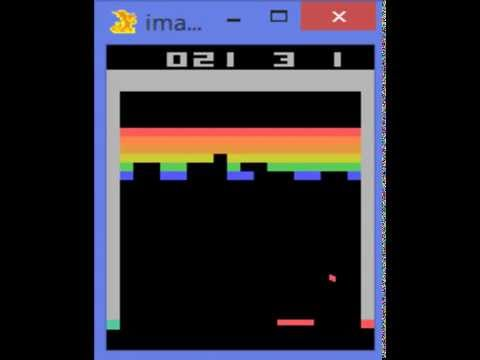

In [12]:
YouTubeVideo('V1eYniJ0Rnk', width=700, height=600)

# General Problem Statement

* We want to approximate $f(x):\,X\to Y$

* Questions in ML:
    * what target $y$ we are predicting?
    * how to select object descriptors (features) $x$?
    * what is the kind of mapping $f$?
    * in what sense a mapping $f$ should approximate true relationship?
    * how to tune $f$?

## Types of target variable (supervised learning)


* $\mathcal{Y}=\mathbb{R}$ - regression 
    * e.g. flat price


* $\mathcal{Y}=\mathbb{R}^{M}$ - vector regression
    * e.g. stock price dynamics


## Types of target variable (supervised learning)

* $\mathcal{Y}=\{\omega_{1},\omega_{2},...\omega_{C}\}$ - classification.
    * C=2: binary classification.
    * e.g. spam / not spam (ham)


* C>2: multi-class classification
    * e.g. identity recognition, activity recognition


* $\mathcal{Y}$ - any subset of $\{\omega_{1},\omega_{2},...\omega_{C}\}$ - labeling
    * e.g. news categorization

## Types of features

* Full object description $\mathbf{x}\in\mathcal{X}$ consists of individual
features $x^{i}\in\mathcal{X}_{i}$
* Types of feature (e.g. for credit scoring):
    * $\mathcal{X}_{i}=\{0,1\}$ - binary feature
        * e.g. marital status 
    * $|\mathcal{X}_{i}|<\infty$ - categorical (nominal) feature
        * e.g. occupation
    * $|\mathcal{X}_{i}|<\infty$ and $\mathcal{X}_{i}$ is ordered - ordinal feature
        *  e.g.education level
    * $\mathcal{X}_{i}=\mathbb{R}$ - continuous feature
        * e.g. age


## Known Set
Known set: $(\mathbf{x}_{1},y_{1}),...(\mathbf{x}_{M},y_{M})$ <br/>
design matrix $X=[\mathbf{x}_{1},...\mathbf{x}_{M}]^{T}$, $Y=[y_{1},...y_{M}]^{T}$.

<center><img src='img/known_all.png'></center>


## Known Set
Known set: $(\mathbf{x}_{1},y_{1}),...(\mathbf{x}_{M},y_{M})$ <br/>
design matrix $X=[\mathbf{x}_{1},...\mathbf{x}_{M}]^{T}$, $Y=[y_{1},...y_{M}]^{T}$.

<center><img src='img/known_all_object.png'></center>


## Known Set
Known set: $(\mathbf{x}_{1},y_{1}),...(\mathbf{x}_{M},y_{M})$ <br/>
design matrix $X=[\mathbf{x}_{1},...\mathbf{x}_{M}]^{T}$, $Y=[y_{1},...y_{M}]^{T}$.

<center><img src='img/known_all_feature.png'></center>

# Test set

* Known sample $X,Y$: $(\mathbf{x}_{1},y_{1}),...(\mathbf{x}_{M},y_{M})$
* Test sample $X',Y'$: $(\mathbf{x}_{1}',y_{1}'),...(\mathbf{x}_{K}',y_{K}')$

<center><img src='img/train_test_feature.png'></center>

### Credit scoring
* Objects — credit applicantion
* Target — return credit of not
* Kind of task and features?


### Credit scoring
* Binary: sex, 
* Categorical: living region, profession, marital status
* Ordinal: education level, work grade
* Continuous: age, wage

### Churn prediction
* Object — online game user
* Target — will he/she lose interest in playing after 2 weeks?
* Kind of task and features?

### Churn prediction
* Binary: premium user
* Categorical: avatar class, game plan
* Continuous: average playing hours per day, number of characters, chat activity

# Learning = Representation + Evaluation + Optimization

[A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) // Pedro Domingos

## Model Class (Representation)
### Linear Example

* **Function class** - parametrized set of functions $F=\{f_{\theta},\,\theta\in\Theta\}$,
from which the true relationship $\mathcal{X}\to\mathcal{Y}$ is approximated.
    * **Regression**: $\widehat{y}=f(x|\theta)$, 
    * **Classification**: $\widehat{y}=f(x|\theta)=\arg\max_{c}\left\{ g_{c}(x|\theta)\right\} $, $c=1,2,...C$.
        * $c=1,2,...C$: possible classes, $g_{c}(x)$ - score of class $c$,
given $x$ called *discriminant function*

## Examples

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"> linear regression $y\in\mathbb{R}$: $$f(x\mathbf{|\theta})=\theta_{0}+\theta_{1}x$$ <img width=400 src='img/linear regression.png'></th>
    <th class="tg-031e"> linear classification $y\in\{1,2\}$:
\begin{align*}
g_{c}(\mathbf{x}|\theta) & =\theta_{c}^{0}+\theta_{c}^{1}x^{1}+\theta_{c}^{2}x^{2},\,c=1,2.\\
f(\mathbf{x|\theta}) & =\arg\max_{c}g_{c}(x|\theta)
\end{align*}<img width=500 src='img/linear classification.png'></th>
  </tr>
</table>

## Loss function vs model quality (Evaluation)

* In machine learning models try to optimize some function, which you can call:
    * **score, rating** - if you are maximizing
    * **loss, cost, error** - if you are minimized
    * both score and loss can be computed for individual objects
    * directly optimized in model
    
    
* Model **quality measures** are used to compare diffrent models' performance on test set
    * some of them can not be directly optimized in the model
    * usually can not be computed for individual objects


## Loss function $\mathcal{L}(\widehat{y},y)$

* **regression**:
    * MAE (mean absolute error):
$$
\mathcal{L}(\widehat{y},y)=\frac{1}{N}\sum\limits_i\left|\widehat{y}_i-y_i\right|
$$
    * MSE (mean squared error):
$$
\mathcal{L}(\widehat{y},y)=\frac{1}{N}\sum\limits_i\left(\widehat{y}_i-y_i\right)^{2}
$$

<center><img src='img/metric-example.png'></center>

In [9]:
## Еще раз про logloss

h = np.linspace(0, 1, 200) # вероятность класса +1, которую дает классификатор
L1 = -np.log(h) # полагаем, то объект относится к классу +1. Тогда это значение его ошибки logloss
L2 = -np.log(1-h) # полагаем, то объект относится к классу -1. Тогда это значение его ошибки logloss


/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


* **classification**:
    * log-loss
$$
\mathcal{L}(\widehat{y},y)=\mathbb{I}[y==1]\log\left(p(\hat{y} = 1)\right) + \mathbb{I}[y==-1]\log\left(p(\hat{y}=-1)\right)
$$


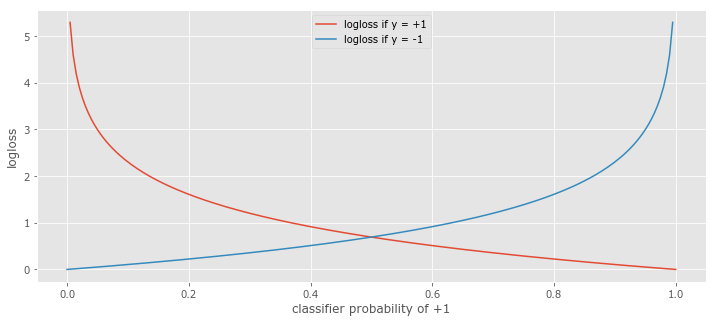

In [11]:
plt.plot(h, L1, label='logloss if y = +1')
plt.plot(h, L2, label='logloss if y = -1')
plt.ylabel('logloss')
plt.xlabel('classifier probability of +1')

_ = plt.legend()

## Optimization

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/contours_evaluation_optimizers.gif'></th>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif'></th>
  </tr>
</table>

## Overfitting - Underfitting

<center><img src='img/overfit.png'></center>

## Empirical risk

* Want to minimize *expected risk*:
$$
\mathit{\int}\int\mathit{\mathcal{L}(f_{\theta}(\mathbf{x}),y) \cdot p(\mathbf{x},y)d\mathbf{x}dy\to\min_{\theta}}
$$

* In fact we have only $X$,$Y$ (Known set) and $X'$ (Test set)

* Can minimize *empirical risk*
$$
L(\theta|X,Y)=\frac{1}{N}\sum_{n=1}^{N}\mathcal{L}(f_{\theta}(\mathbf{x}_{n}),\,y_{n})
$$

* Method of empirical risk minimization:
$$
\widehat{\theta}=\arg\min_{\theta}L(\theta|X,Y)
$$


* How to get realistic estimate of $L(\widehat{\theta}|X',Y')$?
    * separate **validation set**
    * **cross-validation**
    * **leave-one-out** method

# Summary

* Machine learning algorithms reconstruct relationship between features $x$ and outputs $y$.
* Relationship is reconstructed by optimal function $\widehat{y}=f_{\widehat{\theta}}(x)$ from function class $\{f_{\theta}(x),\,\theta\in\Theta\}$.
* $\theta$ is particular controls model complexity, models may be too simple and too complex.
* $\widehat{\theta}$ selected to minimize empirical risk $\frac{1}{N}\sum_{n=1}^{N}\mathcal{L}(f_{\theta}(x_{n}),y_{n})$ for some loss function $\mathcal{L}(\widehat{y},y)$.
* Overfitting - non-realistic estimate of expected loss on the training set.
* To avoid overfitting - use validation sets, cross-validation, A/B test.

# FYI

* [Open Data Science Russion Community](http://ods.ai/)
* [ML Trainings](https://www.youtube.com/channel/UCeq6ZIlvC9SVsfhfKnSvM9w)
* [Kaggle](https://www.kaggle.com/)